In [1]:

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import pandas as pd


In [2]:
df = pd.read_csv('../data/real_estate_data.csv')

In [3]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [4]:
print(df.shape)

(1883, 26)


In [5]:
# Display unique values of 'basement'
df.basement.unique()

array([ nan,   1.])

In [6]:
# Missing basement values should be 0
df['basement'] = df.basement.fillna(0)

In [7]:
# Display unique values of 'basement'
df.basement.unique()

array([ 0.,  1.])

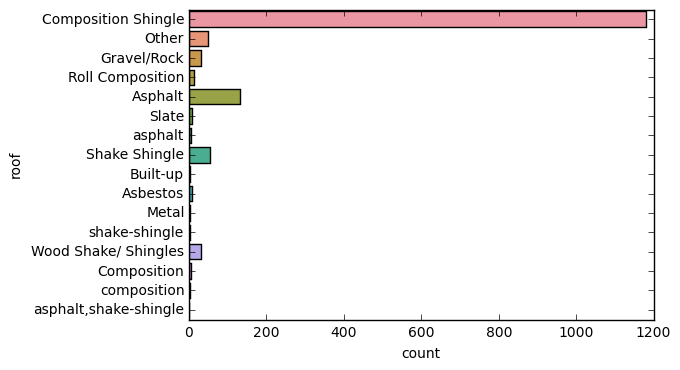

In [8]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)

In [9]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'ashpalt, shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

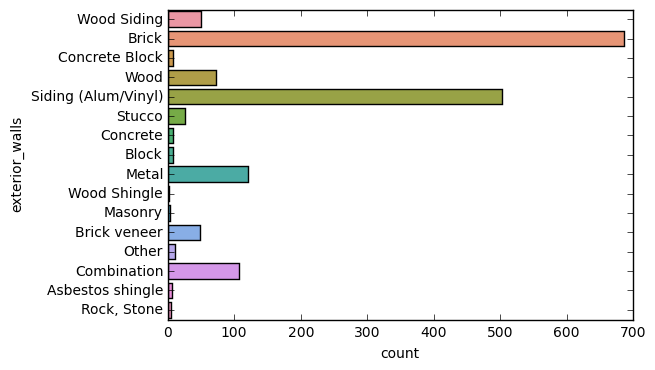

In [10]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

In [11]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

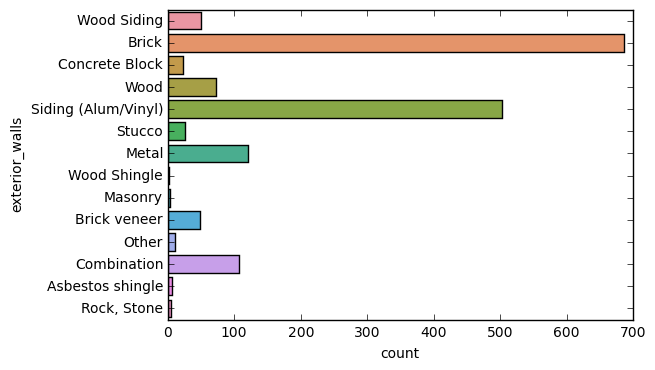

In [12]:

# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

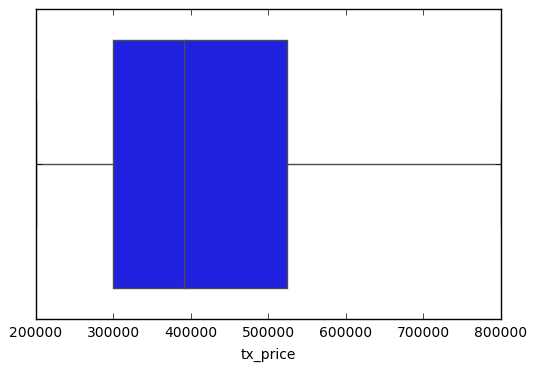

In [20]:
#Remove unwanted outliers
# Box plot of 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)

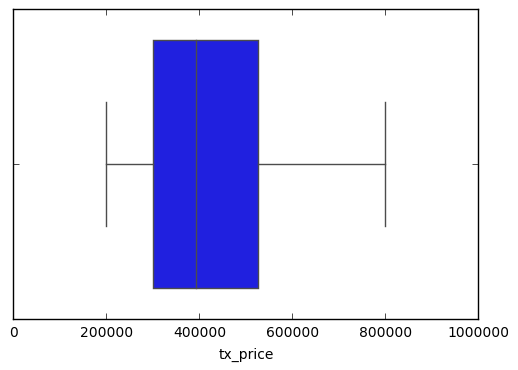

/Users/aribahmehreen/.virtualenvs/keras_tf/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


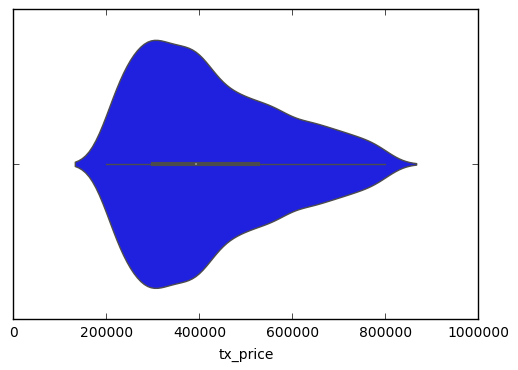

In [21]:
# Violin plot of 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000)
plt.show()

sns.violinplot(df.tx_price)
plt.show()

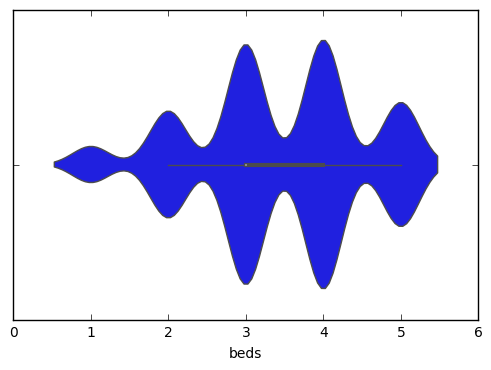

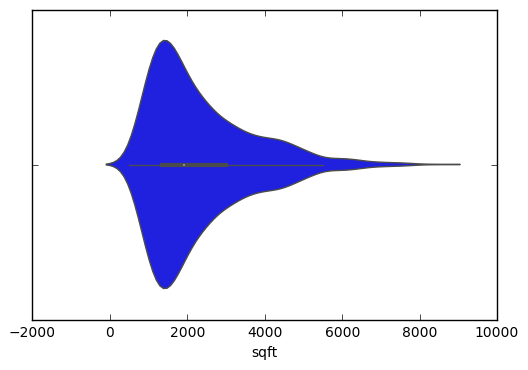

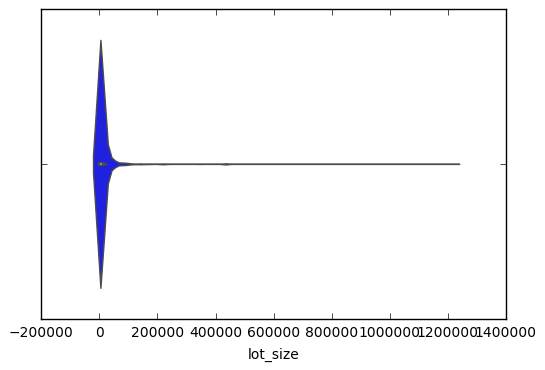

In [22]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

In [23]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [24]:
#The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft.

In [25]:
# Remove lot_size outliers
df = df[df["lot_size"] <= 500000]
# print length of df
print(len(df))

1882


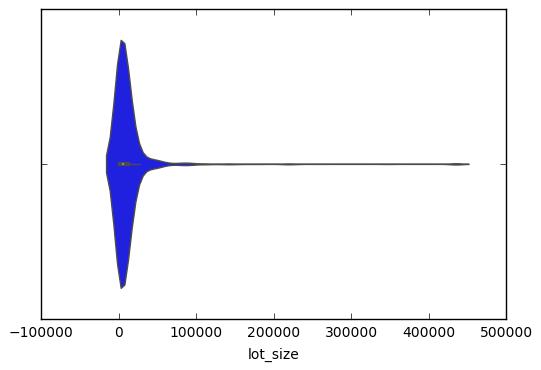

In [26]:
sns.violinplot(df.lot_size)
plt.show()

In [29]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [31]:
df['property_type']

0       Apartment / Condo / Townhouse
1       Apartment / Condo / Townhouse
2       Apartment / Condo / Townhouse
3       Apartment / Condo / Townhouse
4       Apartment / Condo / Townhouse
5       Apartment / Condo / Townhouse
6                       Single-Family
7       Apartment / Condo / Townhouse
8       Apartment / Condo / Townhouse
9       Apartment / Condo / Townhouse
10      Apartment / Condo / Townhouse
11      Apartment / Condo / Townhouse
12      Apartment / Condo / Townhouse
13      Apartment / Condo / Townhouse
14      Apartment / Condo / Townhouse
15      Apartment / Condo / Townhouse
16      Apartment / Condo / Townhouse
17      Apartment / Condo / Townhouse
18      Apartment / Condo / Townhouse
19      Apartment / Condo / Townhouse
20      Apartment / Condo / Townhouse
21      Apartment / Condo / Townhouse
22      Apartment / Condo / Townhouse
23      Apartment / Condo / Townhouse
24      Apartment / Condo / Townhouse
25      Apartment / Condo / Townhouse
26      Apar

In [32]:
#Label missing categorical data
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [34]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

In [35]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()


property_type     0
exterior_walls    0
roof              0
dtype: int64

In [38]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [40]:
df.to_csv('../data/cleaned_data.csv', index=None)

### Assingments 

Example all below functions

#### Importing Data 

* pd.read_csv(filename) # From a CSV file
* pd.read_table(filename) # From a delimited text file (like TSV)
* pd.read_excel(filename) # From an Excel file
* pd.read_sql(query, connection_object) # Reads from a SQL table/database
* pd.read_json(json_string) # Reads from a JSON formatted string, URL or file.
* pd.read_html(url) # Parses an html URL, string or file and extracts tables to a list of dataframes
* pd.DataFrame(dict) # From a dict, keys for columns names, values for data as lists

#### Exploring Data 

* df.shape() # Prints number of rows and columns in dataframe
* df.head(n) # Prints first n rows of the DataFrame
* df.tail(n) # Prints last n rows of the DataFrame
* df.info() # Index, Datatype and Memory information
* df.describe() # Summary statistics for numerical columns
* s.value_counts(dropna=False) # Views unique values and counts
* df.apply(pd.Series.value_counts) # Unique values and counts for all columns
* df.describe() # Summary statistics for numerical columns
* df.mean() # Returns the mean of all columns
* df.corr() # Returns the correlation between columns in a DataFrame
* df.count() # Returns the number of non-null values in each DataFrame column
* df.max() # Returns the highest value in each column
* df.min() # Returns the lowest value in each column
* df.median() # Returns the median of each column
* df.std() # Returns the standard deviation of each column
* 
#### Selecting

* df[col] # Returns column with label col as Series
* df[[col1, col2]] # Returns Columns as a new DataFrame
* s.iloc[0] # Selection by position (selects first element)
* s.loc[0] # Selection by index (selects element at index 0)
* df.iloc[0,:] # First row
* df.iloc[0,0] # First element of first column
 
#### Data Cleaning
* df.columns = ['a','b','c'] # Renames columns
* pd.isnull() # Checks for null Values, Returns Boolean Array
* pd.notnull() # Opposite of s.isnull()
* df.dropna() # Drops all rows that contain null values
* df.dropna(axis=1) # Drops all columns that contain null values
* df.dropna(axis=1,thresh=n) # Drops all rows have have less than n non null values
* df.fillna(x) # Replaces all null values with x
* s.fillna(s.mean()) # Replaces all null values with the mean (mean can be replaced with almost any function from the statistics section)
* s.astype(float) # Converts the datatype of the series to float
* s.replace(1,'one') # Replaces all values equal to 1 with 'one'
* s.replace([1,3],['one','three']) # Replaces all 1 with 'one' and 3 with 'three'
* df.rename(columns=lambda x: x + 1) # Mass renaming of columns
* df.rename(columns={'old_name': 'new_ name'}) # Selective renaming
* df.set_index('column_one') # Changes the index
* df.rename(index=lambda x: x + 1) # Mass renaming of index
* #Filter, Sort and Group By
* df[df[col] > 0.5] # Rows where the col column is greater than 0.5
* df[(df[col] > 0.5) & (df[col] < 0.7)] # Rows where 0.5 < col < 0.7
* df.sort_values(col1) # Sorts values by col1 in ascending order
* df.sort_values(col2,ascending=False) # Sorts values by col2 in descending order
* df.sort_values([col1,col2], ascending=[True,False]) # Sorts values by col1 in ascending order then col2 in descending order
* df.groupby(col) # Returns a groupby object for values from one column
* df.groupby([col1,col2]) # Returns a groupby object values from multiple columns
* df.groupby(col1)[col2].mean() # Returns the mean of the values in col2, grouped by the values in col1 (mean can be replaced with almost any function from the statistics section)
* df.pivot_table(index=col1, values= col2,col3], aggfunc=mean) # Creates a pivot table that groups by col1 and calculates the mean of col2 and col3
* df.groupby(col1).agg(np.mean) # Finds the average across all columns for every unique column 1 group
* df.apply(np.mean) # Applies a function across each column
* df.apply(np.max, axis=1) # Applies a function across each row
* 
#### Joining and Combining
* df1.append(df2) # Adds the rows in df1 to the end of df2 (columns should be identical)
* pd.concat([df1, df2],axis=1) # Adds the columns in df1 to the end of df2 (rows should be identical)
* df1.join(df2,on=col1,how='inner') # SQL-style joins the columns in df1 with the columns on df2 where th

#### Writing Data
* df.to_csv(filename) # Writes to a CSV file
* df.to_excel(filename) # Writes to an Excel file
* df.to_sql(table_name, connection_object) # Writes to a SQL table
* df.to_json(filename) # Writes to a file in JSON format
* df.to_html(filename) # Saves as an HTML table
* df.to_clipboard() # Writes to the clipboard